# **8. BINARY TREES**

A tree consists of nodes connected by edges. A tree is actually an instance of a more general category called a graph.

In computer programs, nodes often represent entities such as file folders, files, departments, people, and so on—in other words, the typical records and items stored in any 
kind of data structure. In an object-oriented programming language, the nodes are objects that represent entities, sometimes in the real world.


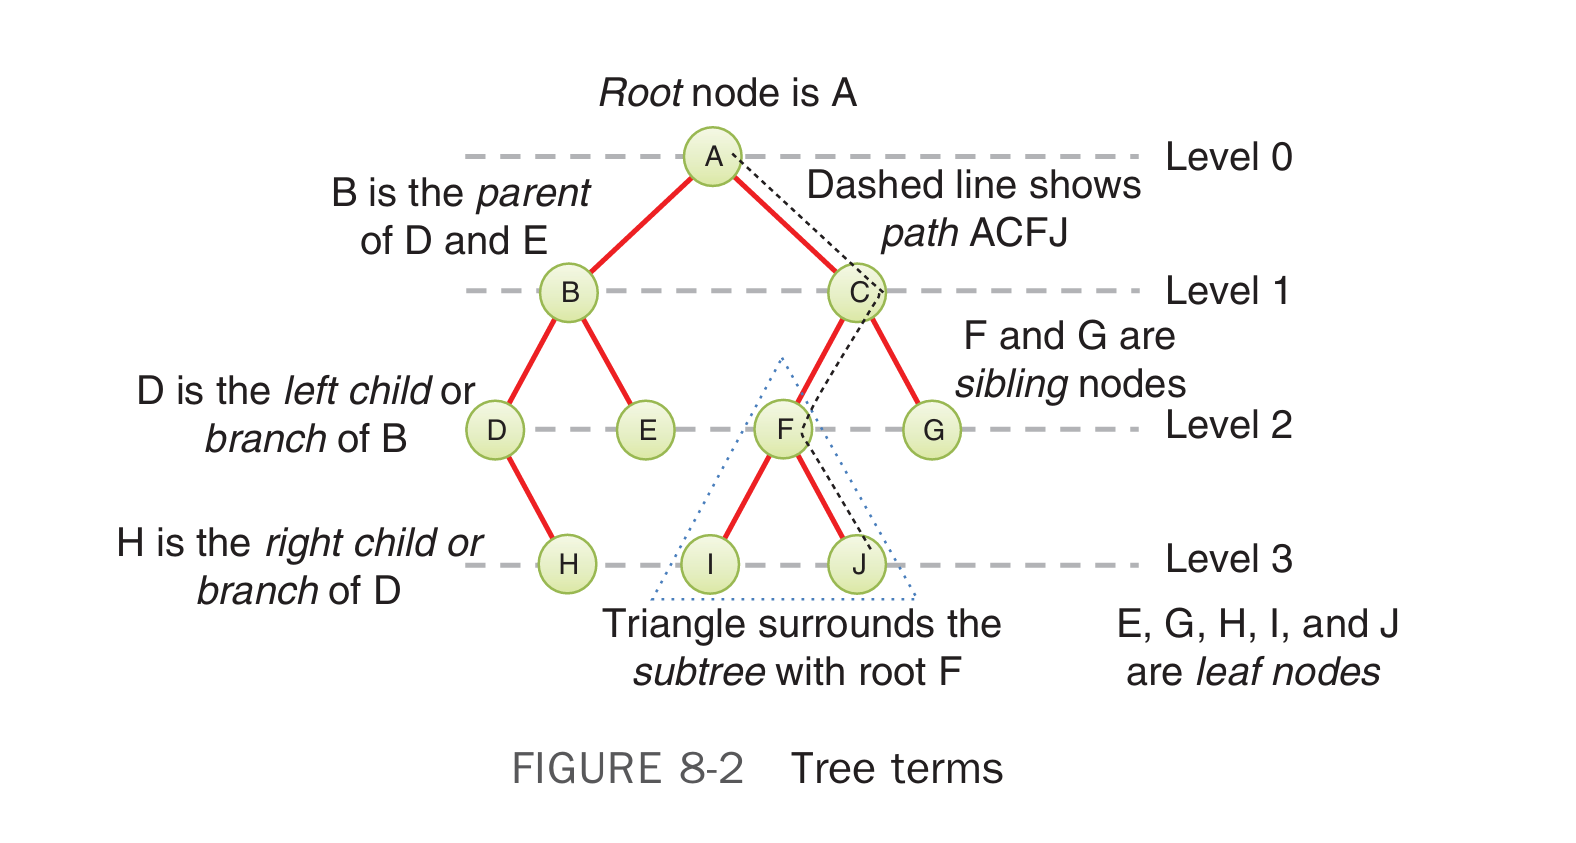

In [2]:
from IPython.display import Image, display
display(Image(filename="picture1.png", width=1000))

### Efficiency of a bimary tree

As you can see, the time required to find a node depends on its depth in the tree, the number of levels below the root. If the tree is balanced, this is **O(log N)** time, or more specifically **O(log2(N))** time, the logarithm to base 2, where N is the number of nodes. It’s just like the binary search done in arrays where half the nodes were eliminated after each comparison. A fully balanced tree is the best case. In the worst case, the tree is completely unbalanced, and the time required is **O(N)**. We discuss the efficiency of `__find()` and other operations toward the end of this chapter.

### **TRAVERSING**

While traversing a tree you have 3 options:

1) **pre-order traversal** goes from root left and extract every value one-by-one till the last index. Afterwards goes right. 

Steps are:

* Visit the node.

* Call itself to traverse the node’s left subtree.

* Call itself to traverse the node’s right subtree.

2) **in-order traverse** makes a stack where stores values, compares each subtree and sorts array that returns

3) **post-order arrays** makes a stack where stores values, and extracts values from bottom left of the tree and goes up. So that the root will be the last index in the array. 

* Call itself to traverse the node’s left subtree.

* Call itself to traverse the node’s right subtree.

* Visit the node.

They are very useful if you’re writing programs that parse or analyze algebraic expressions

### **FINDING MAX AND MIN VALUES**

1) to find **min** value just go to the left until you reach the last left child.

2) to find **max** value go to the right until you reach the last right child




### **DELETING THE NODE**

* The node to be deleted is a leaf (has no children).

* The node to be deleted has one child.

* The node to be deleted has two children.




1) **CASE 1: The node to be deleted has no children.**

To delete a leaf node, you simply change the appropriate child field in the node’s parent to None instead of to the node. The node object still exists, but it is no longer part of the tree, as shown when deleting node 17 on a picture. 

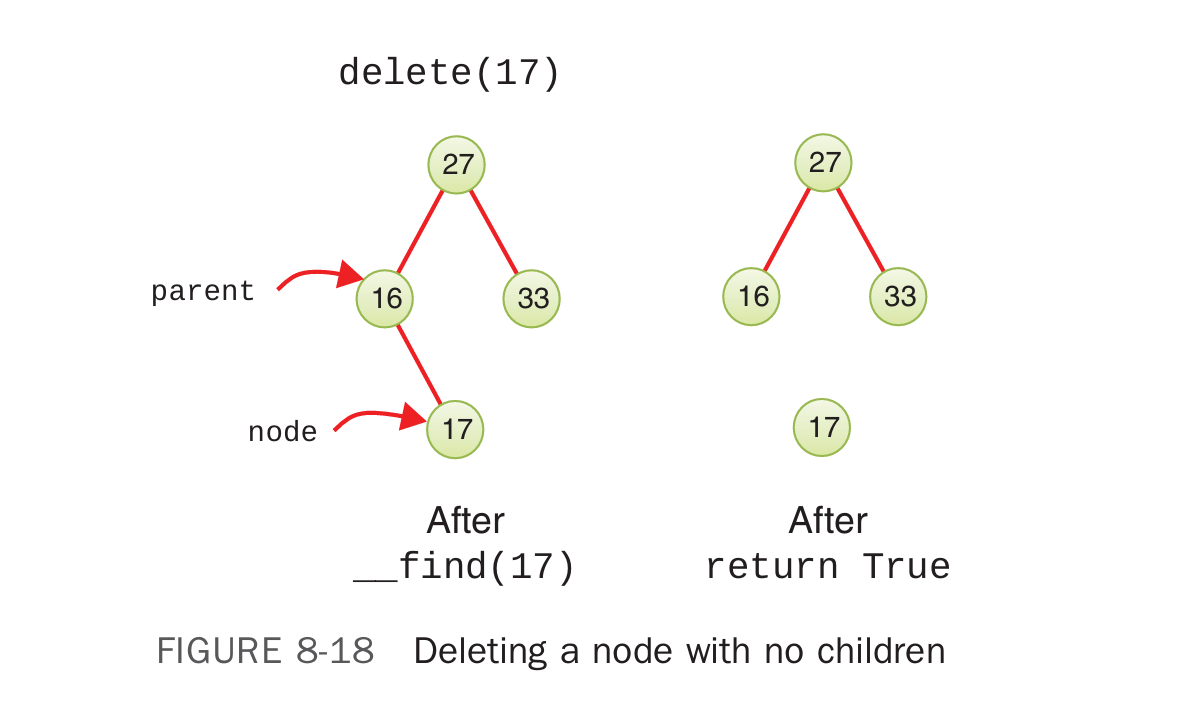

In [2]:
from IPython.display import Image, display
display(Image(filename="picture2.png", width=800))

2) **CASE 2: The node to be deleted has 1 child.**

The node has only two edges: one to its parent and one to its only child. You want to "cut" the node out of this sequence by connecting its parent directly to its child. This process involves changing the appropriate reference in the parent.

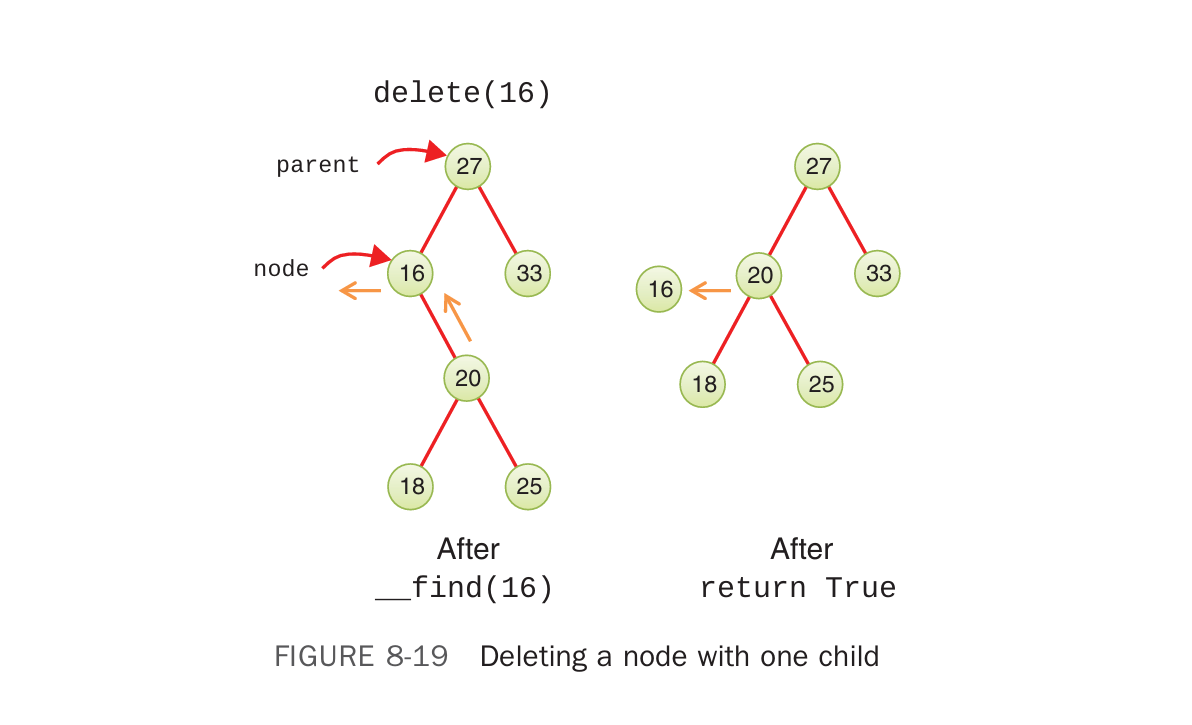

In [3]:
from IPython.display import Image, display
display(Image(filename="picture3.png", width=800))

3) **CASE 3: The node to be deleted has 2 children.**

Option 1: To delete a node with two children, replace the node with its in-order successor. Figure 8 shows a deleted node being replaced by its successor. The nodes are still in order. It’s going to be a little more complicated if the successor itself has children

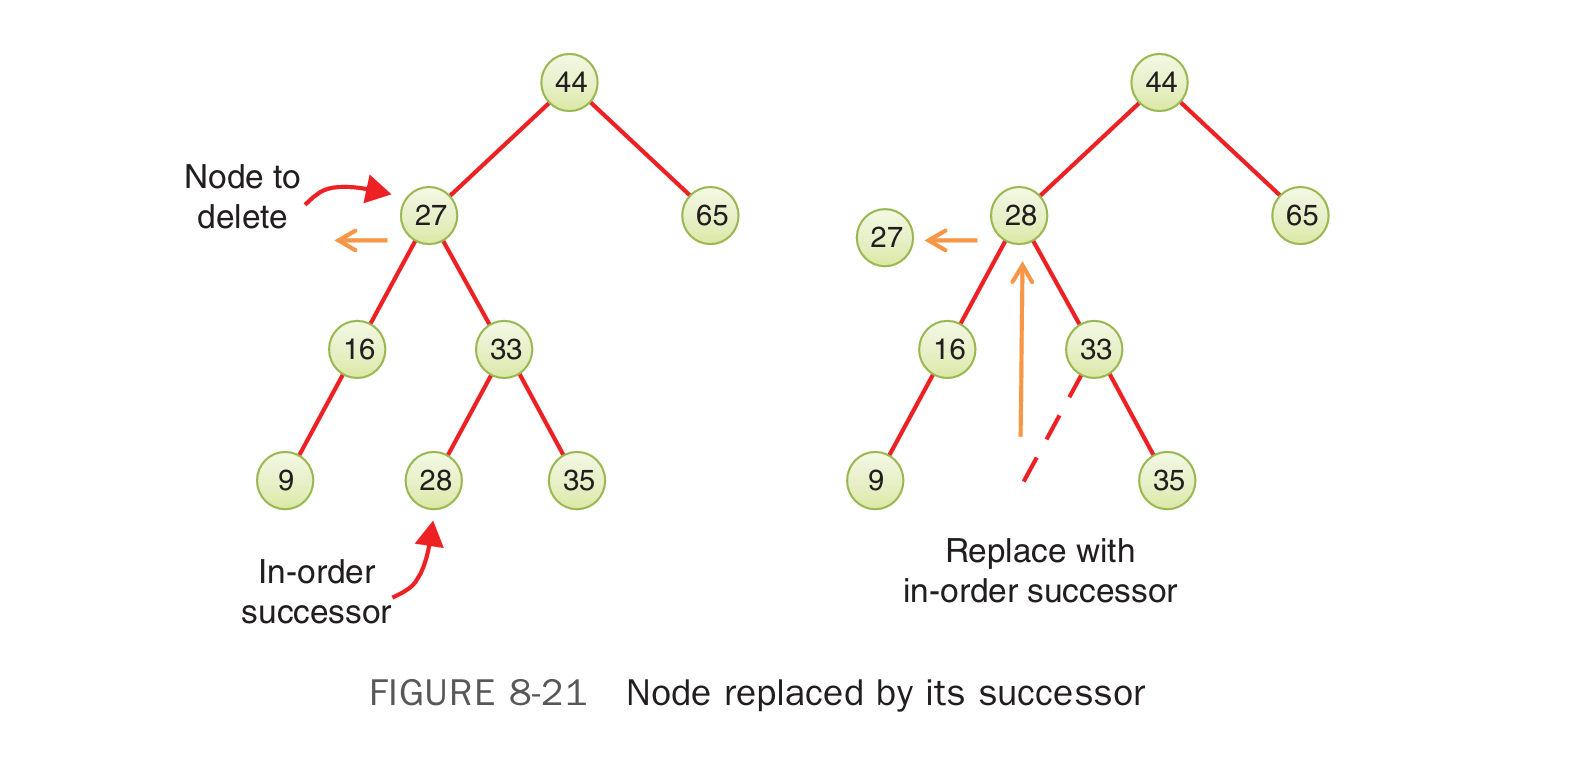

In [4]:
from IPython.display import Image, display
display(Image(filename="picture4.png", width=800))

Option 2: finding the successor

Remember finding the node with the minimum or maximum key? In this case you’re looking for the minimum key larger than the key to be deleted. The node to be deleted has 
both a left and right subtree because you’re working on Case 3. So, you can just look for the minimum key in the right subtree.



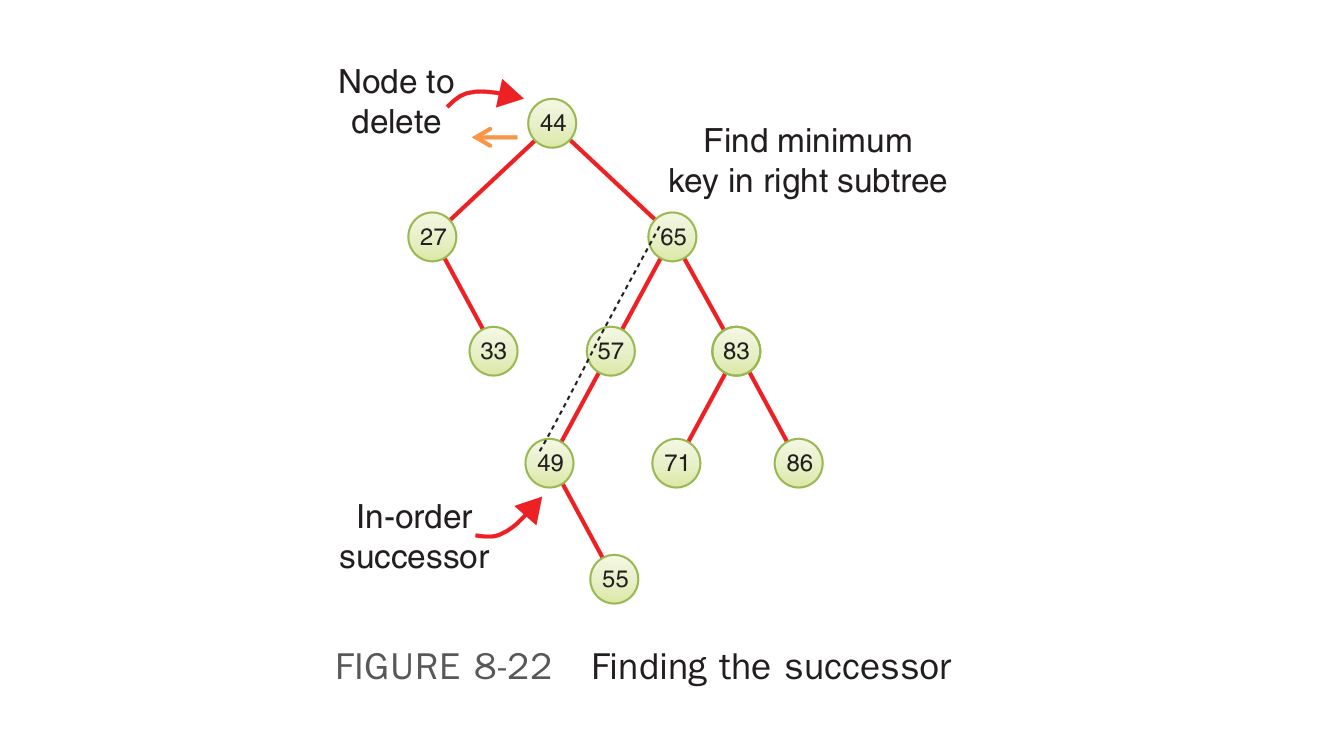

In [5]:
from IPython.display import Image, display
display(Image(filename="picture5.png", width=800))

Any node’s right child key must be less than its parent’s key if it is the left child of that parent. So going up to parent, grandparent, or beyond (following left child links) only leads to larger keys, and those keys can’t be the successor.

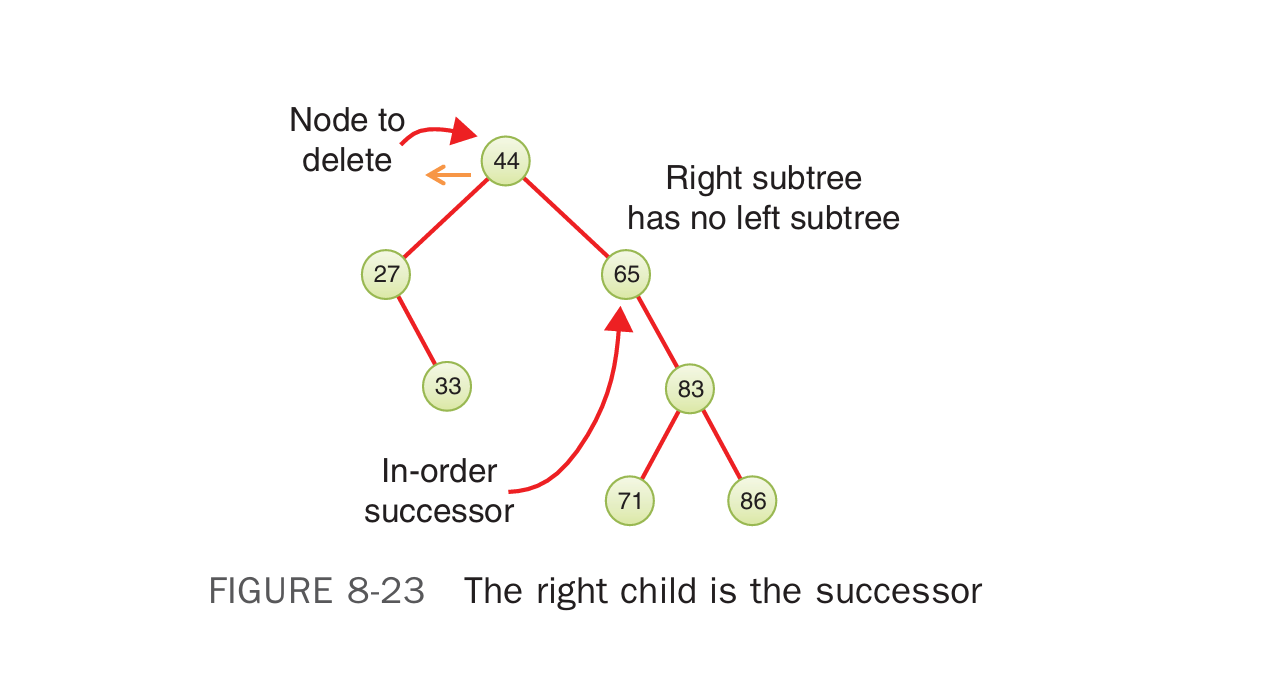

In [6]:
from IPython.display import Image, display
display(Image(filename="picture6.png", width=800))

In [11]:
# Implement binary search trees using Tree and Node classes
# Nodes contain a key and some data

from LinkStack import *

class BinarySearchTree(object):  # A binary search tree class

# To preserve node integrity, node keys and children links should
# not be accessible from the caller, so we make the entire
# Node class hidden, but leave its attributes public for ease
# of manipulating them in the Tree class

   class __Node(object):         # A node in a binary search tree
      def __init__(              # Constructor takes a key that is
            self,                # used to determine the position
            key,                 # inside the search tree,
            data,                # the data associated with the key
            left=None,           # and a left and right child node
            right=None):         # if known
         self.key  = key         # Copy parameters to instance
         self.data = data        # attributes of the object
         self.leftChild = left
         self.rightChild = right

      def __str__(self):         # Represent a node as a string 
         return "{" + str(self.key) + ", " + str(self.data) + "}"

   def __init__(self):        # The tree organizes nodes by their
      self.__root = None      # keys.  Initially, it is empty.
   
   def isEmpty(self):         # Check for empty tree
      return self.__root is None

   def root(self):            # Get the data and key of the root node
      if self.isEmpty():      # If the tree is empty, raise exception
         raise Exception("No root node in empty tree")
      return (                # Otherwise return root data and its key
         self.__root.data, self.__root.key)
      
   def __find(self, goal):    # Find an internal node whose key
      current = self.__root   # matches goal and its parent. Start at
      parent = self           # root and track parent of current node
      while (current and      # While there is a tree left to explore
             goal != current.key): # and current key isn't the goal
         parent = current     # Prepare to move one level down
         current = (          # Advance current to left subtree when
            current.leftChild if goal < current.key else # goal is
            current.rightChild) # less than current key, else right
               
      # If the loop ended on a node, it must have the goal key
      return (current, parent) # Return the node or None and parent

   def search(self, goal):    # Public method to get data associated
      node, p = self.__find(goal) # with a goal key. First, find node
      return node.data if node else None # w/ goal & return any data

   def insert(self,           # Insert a new node in a binary
              key,            # search tree finding where its key
              data):          # places it and storing its data
      node, parent = self.__find( # Try finding the key in the tree
         key)                 # and getting its parent node
      if node:                # If we find a node with this key,
         node.data = data     # then update the node's data
         return False         # and return flag for no insertion

      if parent is self:      # For empty trees, insert new node at
         self.__root = self.__Node(key, data) # root of tree
      elif key < parent.key:  # If new key is less than parent's key,
         parent.leftChild = self.__Node( # insert new node as left
            key, data, right=node)  # child of parent
      else:                   # Otherwise insert new node as right
         parent.rightChild = self.__Node( # child of parent
            key, data, right=node)
      return True             # Return flag for valid insertion

   def inOrderTraverse(       # Visit all nodes of the tree in-order
         self, function=print): # and apply a function to each node
      self.__inOrderTraverse( # Call recursive version starting at
         self.__root, function=function) # root node

   def __inOrderTraverse(     # Visit a subtree in-order, recursively
         self, node, function): # The subtree's root is node
      if node:                # Check that this is real subtree
         self.__inOrderTraverse( # Traverse the left subtree
            node.leftChild, function)
         function(node)       # Visit this node
         self.__inOrderTraverse( # Traverse the right subtree
            node.rightChild, function)

   def traverse_rec(self,         # Traverse the tree recursively in
                traverseType="in"): # pre, in, or post order
      if traverseType in [    # Verify type is an accepted value and
            'pre', 'in', 'post']: # use generator to walk the tree 
         return self.__traverse(  # yielding (key, data) pairs
            self.__root, traverseType) # starting at root
      
      raise ValueError("Unknown traversal type: " + str(traverseType))

   def __traverse(self,       # Recursive generator to traverse
                  node,       # subtree rooted at node in pre, in, or
                  traverseType): # post order
      if node is None:        # If subtree is empty, 
         return               # traversal is done
      if traverseType == "pre": # For pre-order, yield the current
         yield (node.key, node.data) # node before all the others
      for childKey, childData in self.__traverse( # Recursively
            node.leftChild, traverseType): # traverse the left subtree
         yield (childKey, childData)       # yielding its nodes
      if traverseType == "in": # If in-order, now yield the current
         yield (node.key, node.data) # node
      for childKey, childData in self.__traverse( # Recursively
            node.rightChild, traverseType): # traverse right subtree
         yield (childKey, childData)        # yielding its nodes
      if traverseType == "post": # If post-order, yield the current
         yield (node.key, node.data) # node after all the others

   def traverse(self,         # Non-recursive generator to traverse
                traverseType='in'): # tree in pre, in, or post order
      if traverseType not in [ # Verify traversal type is an
            'pre', 'in', 'post']: # accepted value
         raise ValueError(
            "Unknown traversal type: " + str(traverseType))
      
      stack = Stack()         # Create a stack
      stack.push(self.__root) # Put root node in stack
      
      while not stack.isEmpty(): # While there is work in the stack
         item = stack.pop() # Get next item
         if isinstance(item, self.__Node): # If it's a tree node
            if traverseType == 'post': # For post-order, put it last
               stack.push((item.key, item.data))
            stack.push(item.rightChild) # Traverse right child
            if traverseType == 'in': # For pre-order, put item 2nd
               stack.push((item.key, item.data))
            stack.push(item.leftChild) # Traverse left child
            if traverseType == 'pre': # For pre-order, put item 1st
               stack.push((item.key, item.data))
         elif item:           # Every other non-None item is a
            yield item        # (key, value) pair to be yielded

   def minNode(self):         # Find and return node with minimum key
      if self.isEmpty():      # If the tree is empty, raise exception
         raise Exception("No minimum node in empty tree")
      node = self.__root      # Start at root
      while node.leftChild:   # While node has a left child,
         node = node.leftChild # follow left child reference
      return (node.key, node.data) # return final node key and data

   def maxNode(self):         # Find and return node with maximum key
      if self.isEmpty():      # If the tree is empty, raise exception
         raise Exception("No maximum node in empty tree")
      node = self.__root      # Start at root
      while node.rightChild:  # While node has a right child,
         node = node.rightChild # follow right child reference
      return (node.key, node.data) # return final node key and data
         
   def levels(self):          # Count the levels in the tree
      return self.__levels(self.__root) # Count starting at root
   
   def __levels(self, node):  # Recursively count levels in subtree
      if node:                # If a node is provided, then level is 1
         return 1 + max(self.__levels(node.leftChild),  # more than
                        self.__levels(node.rightChild)) # max child
      else: return 0          # Empty subtree has no levels

   def nodes(self):           # Count the tree nodes, using iterator
      count = 0               # Assume an empty tree
      for key, data in self.traverse(): # Iterate over all keys in any
         count += 1           # order and increment count
      return count

   def nodes_rec(self):       # Count the tree nodes, recursively
      return self.__nodes(self.__root) # Count starting at root
   
   def __nodes(self, node):   # Recursively count nodes in subtree
      if node:                # If a node is provided, then sum the
         return (1 + self.__nodes(node.leftChild) +  # node with those
                 self.__nodes(node.rightChild))      # of its children
      else: return 0          # Empty subtree has no nodes

   def print(self,            # Print the tree sideways with 1 node
             indentBy=4):     # on each line and indenting each level
      self.__pTree(self.__root, # by some blanks.  Start at root node
                   "ROOT:   ", "", indentBy) # with no indent
       
   def __pTree(self,          # Recursively print a subtree, sideways 
               node,          # with the root node left justified
               nodeType,      # nodeType shows the relation to its
               indent,        # parent and the indent shows its level
               indentBy=4):   # Increase indent level for subtrees
      if node:                # Only print if there is a node
         self.__pTree(node.rightChild, "RIGHT:  ", # Print the right
                      indent + " " * indentBy, indentBy) # subtree
         print(indent + nodeType, node) # Print this node
         self.__pTree(node.leftChild,  "LEFT:   ", # Print the left
                      indent + " " * indentBy, indentBy) # subtree

   def delete(self, goal):    # Delete a node whose key matches goal
      node, parent = self.__find(goal) # Find goal and its parent
      if node is not None:    # If node was found, 
         return self.__delete( # then perform deletion at node
            parent, node)     # under the parent
      return                  # Else return None for no deletion
      
   def __delete(self,         # Delete the specified node in the tree
                parent, node): # modifying the parent node/tree
      deleted = node.data     # Save the data that's to be deleted
      if node.leftChild:      # Determine number of subtrees 
         if node.rightChild:  # If both subtrees exist,
            self.__promote_successor( # Then promote successor to
               node)          # replace deleted node
         else:                # If no right child, move left child up
            if parent is self: # If parent is the whole tree,
               self.__root = node.leftChild # update root
            elif parent.leftChild is node: # If node is parent's left,
               parent.leftChild = node.leftChild # child, update left
            else:             # else update right child
               parent.rightChild = node.leftChild
      else:                   # No left child; so promote right child
         if parent is self:   # If parent is the whole tree,
            self.__root = node.rightChild # update root
         elif parent.leftChild is node: # If node is parent's left
            parent.leftChild = node.rightChild # child, then update
         else:                # left child link else update
            parent.rightChild = node.rightChild # right child
      return deleted          # Return the deleted node's data

   def __promote_successor( # When deleting a node with both subtrees,
         self,              # find successor on the right subtree, put
                            # its data in this node, and delete the
         node):             # successor from the right subtree
      successor = node.rightChild # Start search for successor in
      parent = node         # right subtree and track its parent
      while successor.leftChild: # Descend left child links until
         parent = successor # no more left links, tracking parent
         successor = successor.leftChild
      node.key = successor.key    # Replace node to delete with
      node.data = successor.data  # successor's key and data
      self.__delete(parent, successor) # Remove successor node


In [2]:
from BinarySearchTree import *
import argparse
import sys

# initialize tree
theTree = BinarySearchTree()
print('Created an empty binary search')


# insert values into binary tree
default_keys = [44, 27, 33, 65, 57, 49, 55, 83, 71, 86, 27]

parser = argparse.ArgumentParser(add_help=False)
parser.add_argument('keys', nargs='*', type=int)
args, _ = parser.parse_known_args()   

keys = args.keys if args.keys else default_keys

count = 0
for key in keys:
    print('Inserting key', key, 'in tree returns', theTree.insert(key, count))
    count += 1

print("The last value was just substituted but not inserted")




Created an empty binary search
Inserting key 44 in tree returns True
Inserting key 27 in tree returns True
Inserting key 33 in tree returns True
Inserting key 65 in tree returns True
Inserting key 57 in tree returns True
Inserting key 49 in tree returns True
Inserting key 55 in tree returns True
Inserting key 83 in tree returns True
Inserting key 71 in tree returns True
Inserting key 86 in tree returns True
Inserting key 27 in tree returns False
The last value was just substituted but not inserted


In [21]:
print('Created a binary search tree with', theTree.nodes(), 'nodes across',
      theTree.levels(), 'levels\n')
theTree.print(indentBy=15)
root_data, root_key = theTree.root()
print()
print('The tree root node has key:', root_key, 'and data:', root_data)

Created a binary search tree with 7 nodes across 4 levels

                                             RIGHT:   {86, 9}
                              RIGHT:   {83, 7}
                                             LEFT:    {71, 8}
               RIGHT:   {65, 3}
                              LEFT:    {57, 4}
                                             LEFT:    {55, 6}
ROOT:    {49, 5}

The tree root node has key: 49 and data: 5


In [4]:
# search for values and tree indexes
dkeys = [keys[i] for i in range(0, 3)] + [37, 40]
for key in dkeys:
   print(f'Searching for {key} returns index {theTree.search(key)}\n')

Searching for 44 returns index 0

Searching for 27 returns index 10

Searching for 33 returns index 2

Searching for 37 returns index None

Searching for 40 returns index None



In [5]:
# deleting value
for key in dkeys:
    print(f'Deleting {key} returns {theTree.delete(key)}')

Deleting 44 returns 0
Deleting 27 returns 10
Deleting 33 returns 2
Deleting 37 returns None
Deleting 40 returns None


In [20]:
# what the tree contains after deletion of some elements
print(f'The binary search tree now contains {theTree.nodes()} nodes across {theTree.levels()} levels\n')
theTree.print(indentBy=15)
print()

# show data in the tree
root_data, root_key = theTree.root()
print(f'The tree root node has key: {root_key}, and data {root_data}')
print()

# find the min value 
min_key, min_data = theTree.minNode()
print(f'The minimum value in the tree is: {min_key} with data {min_data}\n')

# find max value
max_key, max_data = theTree.maxNode()
print(f"The maximim value in the tree is {max_key} with data {max_data}\n") 

The binary search tree now contains 7 nodes across 4 levels

                                             RIGHT:   {86, 9}
                              RIGHT:   {83, 7}
                                             LEFT:    {71, 8}
               RIGHT:   {65, 3}
                              LEFT:    {57, 4}
                                             LEFT:    {55, 6}
ROOT:    {49, 5}

The tree root node has key: 49, and data 5

The minimum value in the tree is: 49 with data 5

The maximim value in the tree is 86 with data 9



In [14]:
# in-order (sorted) traversion

print('Testing the recursive in-order traversal using print function')
theTree.inOrderTraverse()



Testing the recursive in-order traversal using print function
{49, 5}
{55, 6}
{57, 4}
{65, 3}
{71, 8}
{83, 7}
{86, 9}


In [ ]:
# playing out with 3 traverse options
for func in (theTree.traverse_rec, theTree.traverse):
   print('Using {}recursive traversal generator'.format(
      '' if func == theTree.traverse_rec else 'non-'))
   for order in ['pre', 'in', 'post']:
      print(' Traversing the tree using', order, 'order')
      for key, data in func(order):
         print(' {' + str(key) + ', ' + str(data) + '}', end='')
      print()
   print(' Checking for exception for unknown traversal type')
   try:
      for item in func('bad order'):
         print(' Somehow traversal in "bad order" produced:', item)
   except ValueError as e:
      print(' Received expected value error:', e)

Using recursive traversal generator
 Traversing the tree using pre order
 {49, 5} {65, 3} {57, 4} {55, 6} {83, 7} {71, 8} {86, 9}
 Traversing the tree using in order
 {49, 5} {55, 6} {57, 4} {65, 3} {71, 8} {83, 7} {86, 9}
 Traversing the tree using post order
 {55, 6} {57, 4} {71, 8} {86, 9} {83, 7} {65, 3} {49, 5}
 Checking for exception for unknown traversal type
 Received expected value error: Unknown traversal type: bad order
Using non-recursive traversal generator
 Traversing the tree using pre order
 {49, 5} {65, 3} {57, 4} {55, 6} {83, 7} {71, 8} {86, 9}
 Traversing the tree using in order
 {49, 5} {55, 6} {57, 4} {65, 3} {71, 8} {83, 7} {86, 9}
 Traversing the tree using post order
 {55, 6} {57, 4} {71, 8} {86, 9} {83, 7} {65, 3} {49, 5}
 Checking for exception for unknown traversal type
 Received expected value error: Unknown traversal type: bad order


In [23]:
from random import *
random_tree = BinarySearchTree()
seed(5)

# put data into binary tree
for key, data in theTree.traverse('pre'):
    random_tree.insert(key, randrange(1000))
print('A tree with the same keys but random data')
random_tree.print(indentBy=15)

# 
total, count = 0,0
for key, data in random_tree.traverse('pre'):
    total += data
    count += 1
average = total / count

below_average = []
for key, data in random_tree.traverse('in'):
    if data <= average:
        below_average.append((key, data))
print(f'Tree items with below average {average} data are: {below_average}\n')

below_average2 = [(key, data) for key, data in random_tree.traverse('in') if data < average]
print('list comprehension does', 
      '' if below_average == below_average2 else 'not',
      'agree')


A tree with the same keys but random data
                                             RIGHT:   {86, 965}
                              RIGHT:   {83, 814}
                                             LEFT:    {71, 707}
               RIGHT:   {65, 261}
                              LEFT:    {57, 759}
                                             LEFT:    {55, 367}
ROOT:    {49, 637}
Tree items with below average 644.2857142857143 data are: [(49, 637), (55, 367), (65, 261)]

list comprehension does  agree


In [15]:
from random import *
random_tree = BinarySearchTree()
seed(3.14159)
for key, data in theTree.traverse('pre'):
   random_tree.insert(key, randrange(1000))
print('A tree with the same keys but random data:')
random_tree.print(indentBy=2)

total, count = 0, 0
for key, data in random_tree.traverse('pre'):
   total += data
   count += 1
average = total / count
below_average = []
for key, data in random_tree.traverse('in'):
   if data <= average:
      below_average.append((key, data))
print('Tree items with below average', average, 'data are:', 
      below_average)
below_average2 = [
   (key, data) for key, data in random_tree.traverse('in')
   if data <= average]
print('list comprehension does', 
      '' if below_average == below_average2 else 'not',
      'agree')

A tree with the same keys but random data:
      RIGHT:   {86, 502}
    RIGHT:   {83, 495}
      LEFT:    {71, 372}
  RIGHT:   {65, 755}
    LEFT:    {57, 474}
      LEFT:    {55, 686}
ROOT:    {49, 617}
Tree items with below average 557.2857142857143 data are: [(57, 474), (71, 372), (83, 495), (86, 502)]
list comprehension does  agree


# Test the BinarySearchTree class interactively

In [ ]:
# Test the BinarySearchTree class interactively
from BinarySearchTree import *

theTree = BinarySearchTree()  # Start with an empty tree

theTree.insert("Don",  "1974 1")  # Insert some data
theTree.insert("Herb", "1975 2")
theTree.insert("Ken",  "1979 1")
theTree.insert("Ivan", "1988 1")
theTree.insert("Raj",  "1994 1")
theTree.insert("Amir", "1996 1")
theTree.insert("Adi",  "2002 3")
theTree.insert("Ron",  "2002 3")
theTree.insert("Fran", "2006 1")
theTree.insert("Vint", "2006 2")
theTree.insert("Tim",  "2016 1")

def print_commands(names):    # Print a list of possible commands
   print('The possible commands are', names)

def clearTree():              # Remove all the nodes in the tree
   while not theTree.isEmpty():
      data, key = theTree.root()
      theTree.delete(key)
      
def traverseTree(traverseType="in"):  # Traverse & print all nodes
   for key, data in theTree.traverse(traverseType):
      print('{', str(key), ', ', str(data), '}', end=' ')
   print()

commands = [  # Command names, functions, and their parameters
   ['print', theTree.print, []],
   ['insert', theTree.insert, ('key', 'data')],
   ['delete', theTree.delete, ('key', )],
   ['search', theTree.search, ('key', )],
   ['traverse', traverseTree, ('type', )],
   ['clear', clearTree, []],
   ['help', print_commands, []],
   ['?', print_commands, []],
   ['quit', None, []],
]
# Collect all the command names in a list
command_names = ", ".join(c[0] for c in commands)
for i in range(len(commands)): # Put command names in argument list
   if commands[i][1] == print_commands: # of print_commands
      commands[i][2] = [command_names]
# Create a dictionary mapping first character of command name to
# command specification (name, function, parameters/args)
command_dict = dict((c[0][0], c) for c in commands)

# Print information for interactive loop
theTree.print()
print_commands(command_names)
ans = ' '

# Loop to get a command from the user and execute it
while ans[0] != 'q':
   print('The tree has', theTree.nodes(), 'nodes across',
         theTree.levels(), 'levels')
   ans = input("Enter first letter of command: ").lower()
   if len(ans) == 0:
      ans = '?'
   if ans[0] in command_dict:
      name, function, parameters = command_dict[ans[0]]
      if function is not None:
         print(name)
         if isinstance(parameters, list):
            arguments = parameters
         else:
            arguments = []
            for param in parameters:
               arg = input("Enter " + param + " for " + name + " " +
                           "command: ")
               arguments.append(arg)
         try:
            result = function(*arguments)
            print('Result:', result)
         except Exception as e:
            print('Exception occurred')
            print(e)
   else:
      print("Invalid command: '", ans, "'")

# DUBLICATE TREES

As in other data structures, the problem of duplicate keys must be addressed. In the code shown for `insert()` and in the Visualization tool, a node with a duplicate key will not be inserted. The tool shows the data for the node being updated by moving a new colored circle to fill the node.

To allow for duplicate keys, you must make several choices. The duplicates go in the right subtree based on the fundamental binary search tree rule. They form a chain of nodes with only right child links, as shown in Figure 8-26. One of the design choices is where to put any left child link. It should go only at the first or last duplicate in the chain so that the algorithms know where to find it. 

With any kind of duplicate keys, balancing the tree becomes difficult or impossible. The chains of duplicates add extra levels that cannot be rearranged to help with balance. That means the efficiency of finding an item moves away from best case of **O(log N)** toward **O(N)**.

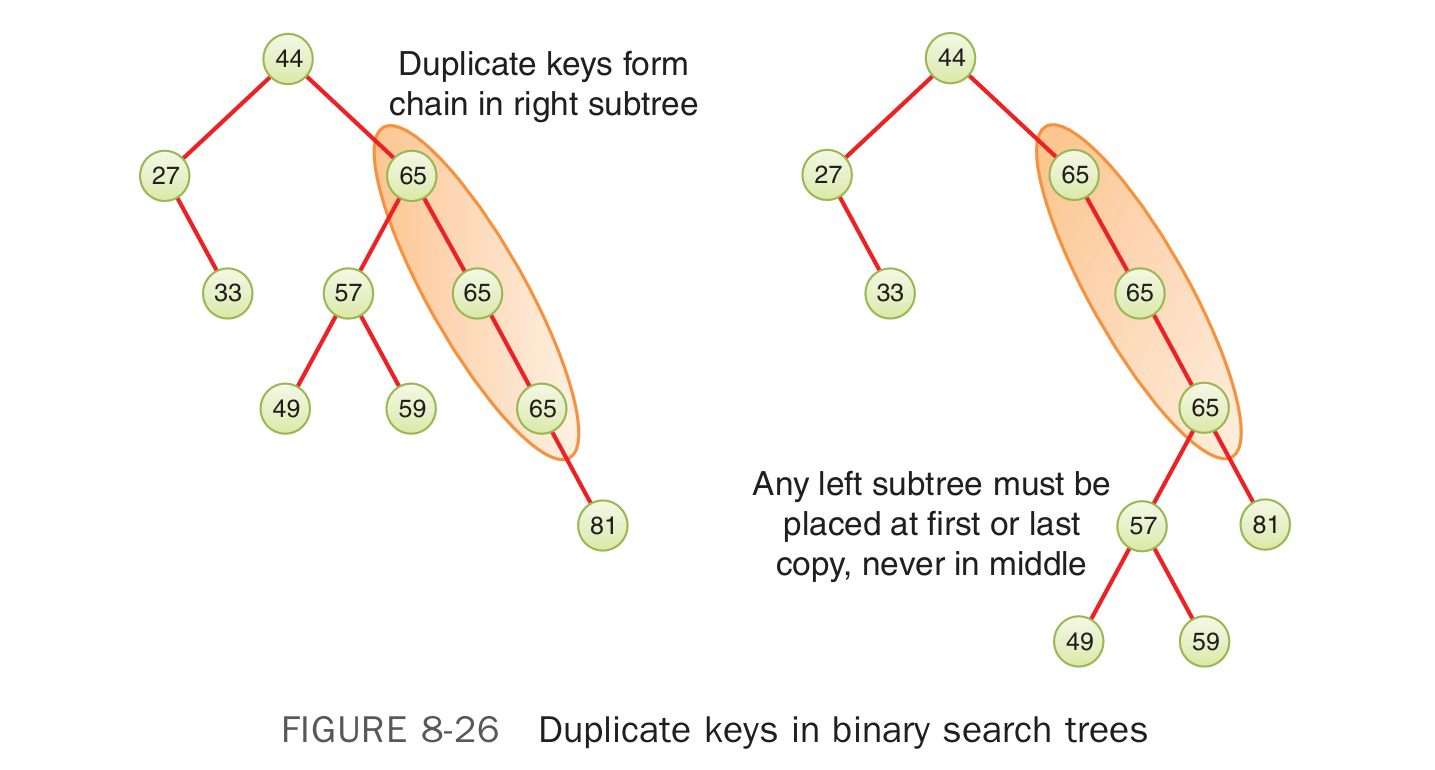

In [27]:
from IPython.display import Image, display
display(Image(filename="picture7.png", width=800))

Another choice is what to return from the `__find()` and `search()` methods for a key that has duplicates. Should it return the first or the last? The choice should also be consistent with what node is deleted and returned by the `delete()` method. If they are inserted at the first and removed from the first, then `delete()` will act like a mini stack for the duplicate nodes.

### **More about yield**

| Feature | `return` | `yield` |
|----------|-----------|---------|
| **Purpose** | Ends the function and gives one final value | Pauses the function and gives one value *at a time* |
| **Function type** | Normal function | Generator function |
| **Execution** | Function stops completely after `return` | Function can *pause and resume* after each `yield` |
| **Output** | A single object (e.g., `int`, `list`, etc.) | A **generator object** that can produce many values |
| **Memory usage** | Must store all results at once (if you want multiple values) | Produces results one by one — no need to store everything |
| **Example** | `return [1,2,3]` → immediately returns the whole list | `yield 1; yield 2; yield 3` → produces each value as needed |

In [6]:
def simple_generator():
    for i in range(5):
        yield i
        print("Resuming after yielding", i)

g = simple_generator()
for x in g:
    print("Got:", x)

Got: 0
Resuming after yielding 0
Got: 1
Resuming after yielding 1
Got: 2
Resuming after yielding 2
Got: 3
Resuming after yielding 3
Got: 4
Resuming after yielding 4
